

1.   https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud verisetini indirin
2.   zipten çıkarıp içindeki creditcard.csv dosyasını kaydırarak colab dosya dizine bırakın






In [1]:
!pip install qiskit qiskit-machine-learning qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4a62f9308a89ea3aec6256c966313c97a112eee016555a54b4b389651f8e3b7e
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
!pip install pennylane pennylane-lightning torch scikit-learn matplotlib pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.6/935.6 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 5.6 MB/s eta 0:00:00


## 4 QUBİT

Veri hazırlanıyor...
Eğitim Başlıyor (Qubits: 4, Layers: 4)... 🚀
Epoch 2/30 	 Loss: 0.6909 	 Train Acc: 47.97%
Epoch 4/30 	 Loss: 0.6473 	 Train Acc: 74.13%
Epoch 6/30 	 Loss: 0.5951 	 Train Acc: 80.09%
Epoch 8/30 	 Loss: 0.5410 	 Train Acc: 84.74%
Epoch 10/30 	 Loss: 0.4950 	 Train Acc: 86.34%
Epoch 12/30 	 Loss: 0.4508 	 Train Acc: 86.34%
Epoch 14/30 	 Loss: 0.4054 	 Train Acc: 89.39%
Epoch 16/30 	 Loss: 0.3790 	 Train Acc: 89.10%
Epoch 18/30 	 Loss: 0.3514 	 Train Acc: 90.12%
Epoch 20/30 	 Loss: 0.3230 	 Train Acc: 90.26%
Epoch 22/30 	 Loss: 0.3012 	 Train Acc: 90.55%
Epoch 24/30 	 Loss: 0.3056 	 Train Acc: 89.97%
Epoch 26/30 	 Loss: 0.2787 	 Train Acc: 91.13%
Epoch 28/30 	 Loss: 0.2673 	 Train Acc: 92.44%
Epoch 30/30 	 Loss: 0.2504 	 Train Acc: 92.59%

🏆 GÜÇLENDİRİLMİŞ FİNAL TEST SONUCU: %92.91
Grafikler için test verisi analiz ediliyor...


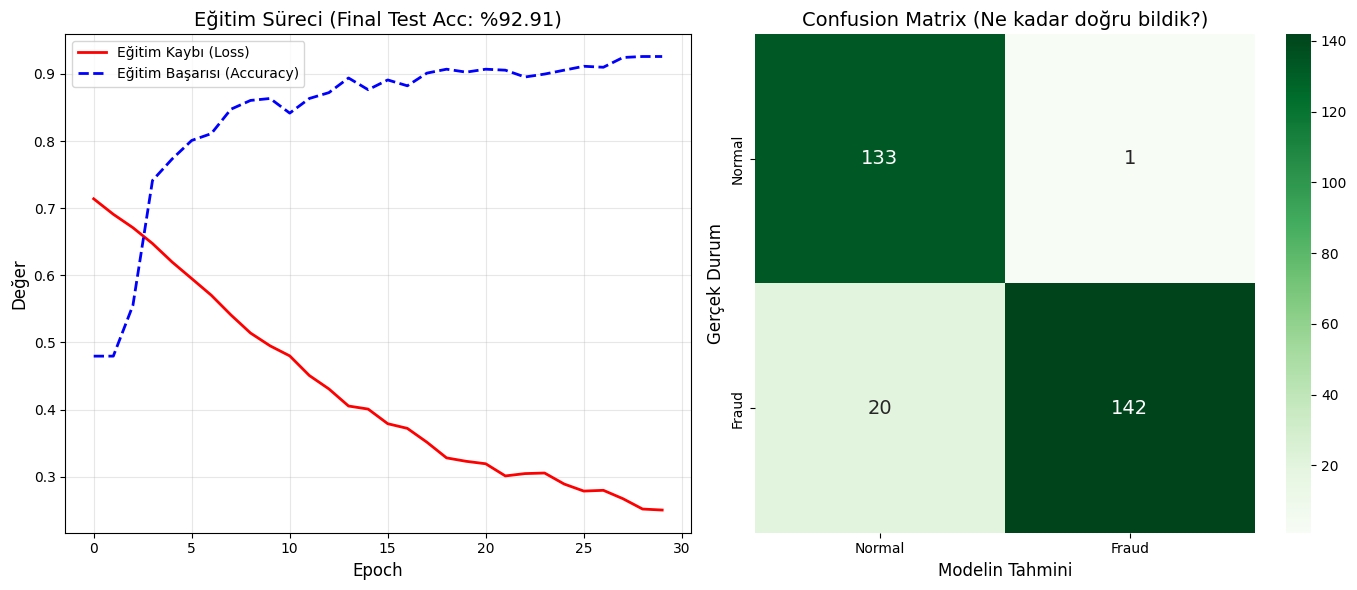


DETAYLI SINIFLANDIRMA RAPORU
              precision    recall  f1-score   support

      Normal       0.87      0.99      0.93       134
       Fraud       0.99      0.88      0.93       162

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pennylane as qml

# ==========================================
# 1. GÜÇLENDİRİLMİŞ AYARLAR
# ==========================================
n_qubits = 4
n_layers = 4
batch_size = 32
learning_rate = 0.001 # Hassas ayar için hızı biraz düşürdük

# ==========================================
# 2. VERİ HAZIRLIĞI
# ==========================================
print("Veri hazırlanıyor...")
df = pd.read_csv('creditcard.csv')

# Dengeleme (Hız için undersampling devam ediyor)
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, normal]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_balanced.drop(['Time', 'Class'], axis=1).values
y = df_balanced['Class'].values

# MinMaxScaler (-1, 1) PennyLane için en iyisi
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# ==========================================
# 3. PENNYLANE QNODE (4 QUBIT)
# ==========================================
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    # Veriyi 4 Qubit'e yayıyoruz
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
    # 4 Katmanlı dolaşıklık
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    # Tüm Qubitleri ölçüyoruz
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# ==========================================
# 4. GÜÇLENDİRİLMİŞ HİBRİT MODEL (ÖZEL MİMARİ)
# ==========================================
class StrongHybridModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Tam istediğin klasik katman yapısı:
        self.fc1 = nn.Linear(29, 16)
        self.fc2 = nn.Linear(16, n_qubits) # n_qubits = 4
        self.dropout = nn.Dropout(0.5)

        # Kuantum Katmanı (4 Qubit, 4 Katman)
        weight_shapes = {"weights": (n_layers, n_qubits, 3)}
        self.qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

        # Çıkış Katmanı
        self.fc_out = nn.Linear(n_qubits, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Klasik Akış: 29 -> 16
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)

        # Klasik Akış: 16 -> 4 (Kuantum öncesi son durak)
        x = torch.relu(self.fc2(x))

        # Kuantum Devresi Hazırlığı (Tanh * Pi)
        x = torch.tanh(x) * np.pi

        # Kuantum Katmanı İşlemesi
        x = self.qlayer(x)

        # Final Tahmini: 4 -> 1
        x = self.fc_out(x)
        return self.sigmoid(x)

# Modeli başlat
model = StrongHybridModel()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_func = nn.BCELoss()
# ==========================================
# 5. EĞİTİM
# ==========================================
print(f"Eğitim Başlıyor (Qubits: {n_qubits}, Layers: {n_layers})... 🚀")

epochs = 30 # Epoch sayısını artırdık
loss_list = []
acc_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        target = target.unsqueeze(1)
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        total_loss.append(loss.item())
        pred = (output > 0.5).float()
        correct += (pred == target).sum().item()
        total += target.size(0)

    avg_loss = sum(total_loss) / len(total_loss)
    avg_acc = 100 * correct / total
    loss_list.append(avg_loss)
    acc_list.append(avg_acc)

    if (epoch+1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs} \t Loss: {avg_loss:.4f} \t Train Acc: {avg_acc:.2f}%")

# ==========================================
# 6. TEST
# ==========================================
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        target = target.unsqueeze(1)
        output = model(data)
        pred = (output > 0.5).float()
        correct += (pred == target).sum().item()
        total += target.size(0)

final_acc = 100 * correct / total
print(f"\n🏆 GÜÇLENDİRİLMİŞ FİNAL TEST SONUCU: %{final_acc:.2f}")

# ==========================================
# SONUÇLARI GÖRSELLEŞTİRME MODÜLÜ
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Test Setini Tekrar Tarayıp Detaylı Veri Alalım
print("Grafikler için test verisi analiz ediliyor...")
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        # PennyLane için boyutu ayarla
        target = target.unsqueeze(1)
        output = model(data)

        # Tahminleri al (0.5 üstü 1, altı 0)
        predictions = (output > 0.5).float()

        # Listelere ekle
        y_true.extend(target.numpy().flatten())
        y_pred.extend(predictions.numpy().flatten())

# 2. Grafikleri Çiz
plt.figure(figsize=(14, 6))

# Grafik A: Eğitim Kaybı ve Başarısı
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Eğitim Kaybı (Loss)', color='red', linewidth=2)
plt.plot([acc/100 for acc in acc_list], label='Eğitim Başarısı (Accuracy)', color='blue', linestyle='--', linewidth=2)
plt.title(f'Eğitim Süreci (Final Test Acc: %{final_acc:.2f})', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Değer', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Grafik B: Confusion Matrix (Karmaşıklık Matrisi)
cm = confusion_matrix(y_true, y_pred)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'], annot_kws={"size": 14})
plt.title('Confusion Matrix (Ne kadar doğru bildik?)', fontsize=14)
plt.ylabel('Gerçek Durum', fontsize=12)
plt.xlabel('Modelin Tahmini', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Detaylı Raporu Yazdır (Precision, Recall, F1-Score)
print("\n" + "="*40)
print("DETAYLI SINIFLANDIRMA RAPORU")
print("="*40)
print(classification_report(y_true, y_pred, target_names=['Normal', 'Fraud']))

# 2 QUBİT

Veri hazırlanıyor...
Eğitim Başlıyor (Qubits: 2, Layers: 4)... 🚀
Epoch 2/30 	 Loss: 0.7445 	 Train Acc: 52.03%
Epoch 4/30 	 Loss: 0.6851 	 Train Acc: 52.03%
Epoch 6/30 	 Loss: 0.6262 	 Train Acc: 52.03%
Epoch 8/30 	 Loss: 0.5841 	 Train Acc: 57.27%
Epoch 10/30 	 Loss: 0.5544 	 Train Acc: 76.31%
Epoch 12/30 	 Loss: 0.5143 	 Train Acc: 84.88%
Epoch 14/30 	 Loss: 0.4858 	 Train Acc: 87.65%
Epoch 16/30 	 Loss: 0.4577 	 Train Acc: 89.68%
Epoch 18/30 	 Loss: 0.4294 	 Train Acc: 89.53%
Epoch 20/30 	 Loss: 0.4184 	 Train Acc: 90.55%
Epoch 22/30 	 Loss: 0.4011 	 Train Acc: 90.26%
Epoch 24/30 	 Loss: 0.3836 	 Train Acc: 91.42%
Epoch 26/30 	 Loss: 0.3607 	 Train Acc: 92.59%
Epoch 28/30 	 Loss: 0.3551 	 Train Acc: 92.01%
Epoch 30/30 	 Loss: 0.3454 	 Train Acc: 91.72%

🏆 GÜÇLENDİRİLMİŞ FİNAL TEST SONUCU: %91.89
Grafikler için test verisi analiz ediliyor...


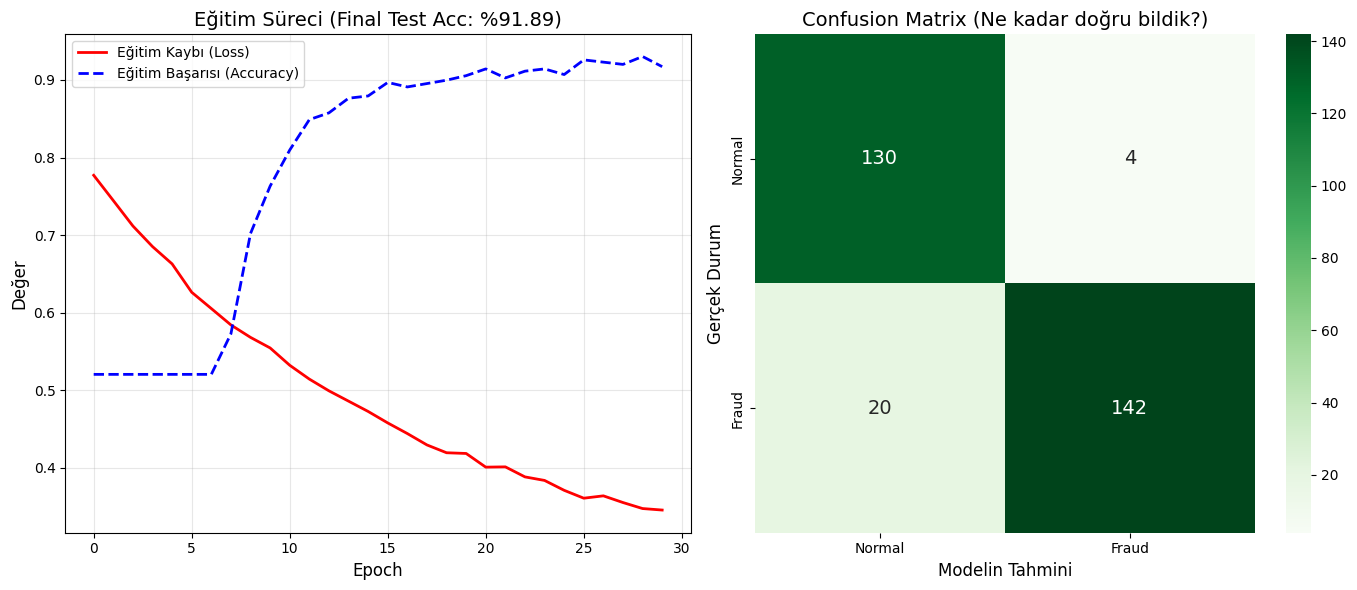


DETAYLI SINIFLANDIRMA RAPORU
              precision    recall  f1-score   support

      Normal       0.87      0.97      0.92       134
       Fraud       0.97      0.88      0.92       162

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pennylane as qml

# ==========================================
# 1. GÜÇLENDİRİLMİŞ AYARLAR
# ==========================================
n_qubits = 2
n_layers = 4
batch_size = 32
learning_rate = 0.001 # Hassas ayar için hızı biraz düşürdük

# ==========================================
# 2. VERİ HAZIRLIĞI
# ==========================================
print("Veri hazırlanıyor...")
df = pd.read_csv('creditcard.csv')

# Dengeleme (Hız için undersampling devam ediyor)
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, normal]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_balanced.drop(['Time', 'Class'], axis=1).values
y = df_balanced['Class'].values

# MinMaxScaler (-1, 1) PennyLane için en iyisi
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# ==========================================
# 3. PENNYLANE QNODE (2 QUBIT)
# ==========================================
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    # Veriyi 2 Qubit'e yayıyoruz
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
    # 2 Katmanlı dolaşıklık
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    # Tüm Qubitleri ölçüyoruz
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# ==========================================
# 4. GÜÇLENDİRİLMİŞ HİBRİT MODEL (ÖZEL MİMARİ)
# ==========================================
class StrongHybridModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Tam istediğin klasik katman yapısı:
        self.fc1 = nn.Linear(29, 16)
        self.fc2 = nn.Linear(16, n_qubits) # n_qubits = 2
        self.dropout = nn.Dropout(0.5)

        # Kuantum Katmanı (2 Qubit, 4 Katman)
        weight_shapes = {"weights": (n_layers, n_qubits, 3)}
        self.qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

        # Çıkış Katmanı
        self.fc_out = nn.Linear(n_qubits, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Klasik Akış: 29 -> 16
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)

        # Klasik Akış: 16 -> 2 (Kuantum öncesi son durak)
        x = torch.relu(self.fc2(x))

        # Kuantum Devresi Hazırlığı (Tanh * Pi)
        x = torch.tanh(x) * np.pi

        # Kuantum Katmanı İşlemesi
        x = self.qlayer(x)

        # Final Tahmini: 4 -> 1
        x = self.fc_out(x)
        return self.sigmoid(x)

# Modeli başlat
model = StrongHybridModel()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_func = nn.BCELoss()
# ==========================================
# 5. EĞİTİM
# ==========================================
print(f"Eğitim Başlıyor (Qubits: {n_qubits}, Layers: {n_layers})... 🚀")

epochs = 30 # Epoch sayısını artırdık
loss_list = []
acc_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        target = target.unsqueeze(1)
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        total_loss.append(loss.item())
        pred = (output > 0.5).float()
        correct += (pred == target).sum().item()
        total += target.size(0)

    avg_loss = sum(total_loss) / len(total_loss)
    avg_acc = 100 * correct / total
    loss_list.append(avg_loss)
    acc_list.append(avg_acc)

    if (epoch+1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs} \t Loss: {avg_loss:.4f} \t Train Acc: {avg_acc:.2f}%")

# ==========================================
# 6. TEST
# ==========================================
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        target = target.unsqueeze(1)
        output = model(data)
        pred = (output > 0.5).float()
        correct += (pred == target).sum().item()
        total += target.size(0)

final_acc = 100 * correct / total
print(f"\n🏆 GÜÇLENDİRİLMİŞ FİNAL TEST SONUCU: %{final_acc:.2f}")

# ==========================================
# SONUÇLARI GÖRSELLEŞTİRME MODÜLÜ
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Test Setini Tekrar Tarayıp Detaylı Veri Alalım
print("Grafikler için test verisi analiz ediliyor...")
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        # PennyLane için boyutu ayarla
        target = target.unsqueeze(1)
        output = model(data)

        # Tahminleri al (0.5 üstü 1, altı 0)
        predictions = (output > 0.5).float()

        # Listelere ekle
        y_true.extend(target.numpy().flatten())
        y_pred.extend(predictions.numpy().flatten())

# 2. Grafikleri Çiz
plt.figure(figsize=(14, 6))

# Grafik A: Eğitim Kaybı ve Başarısı
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Eğitim Kaybı (Loss)', color='red', linewidth=2)
plt.plot([acc/100 for acc in acc_list], label='Eğitim Başarısı (Accuracy)', color='blue', linestyle='--', linewidth=2)
plt.title(f'Eğitim Süreci (Final Test Acc: %{final_acc:.2f})', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Değer', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Grafik B: Confusion Matrix (Karmaşıklık Matrisi)
cm = confusion_matrix(y_true, y_pred)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'], annot_kws={"size": 14})
plt.title('Confusion Matrix (Ne kadar doğru bildik?)', fontsize=14)
plt.ylabel('Gerçek Durum', fontsize=12)
plt.xlabel('Modelin Tahmini', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Detaylı Raporu Yazdır (Precision, Recall, F1-Score)
print("\n" + "="*40)
print("DETAYLI SINIFLANDIRMA RAPORU")
print("="*40)
print(classification_report(y_true, y_pred, target_names=['Normal', 'Fraud']))

# 8 QUBİT

Veri hazırlanıyor...
Eğitim Başlıyor (Qubits: 8, Layers: 4)... 🚀
Epoch 2/30 	 Loss: 0.6807 	 Train Acc: 52.91%
Epoch 4/30 	 Loss: 0.6635 	 Train Acc: 70.93%
Epoch 6/30 	 Loss: 0.6377 	 Train Acc: 80.52%
Epoch 8/30 	 Loss: 0.6013 	 Train Acc: 86.48%
Epoch 10/30 	 Loss: 0.5599 	 Train Acc: 88.66%
Epoch 12/30 	 Loss: 0.5246 	 Train Acc: 89.68%
Epoch 14/30 	 Loss: 0.4823 	 Train Acc: 91.42%
Epoch 16/30 	 Loss: 0.4468 	 Train Acc: 91.28%
Epoch 18/30 	 Loss: 0.4091 	 Train Acc: 92.15%
Epoch 20/30 	 Loss: 0.3828 	 Train Acc: 92.73%
Epoch 22/30 	 Loss: 0.3429 	 Train Acc: 92.73%
Epoch 24/30 	 Loss: 0.3143 	 Train Acc: 93.46%
Epoch 26/30 	 Loss: 0.2948 	 Train Acc: 93.75%
Epoch 28/30 	 Loss: 0.2783 	 Train Acc: 92.01%
Epoch 30/30 	 Loss: 0.2574 	 Train Acc: 92.73%

🏆 GÜÇLENDİRİLMİŞ FİNAL TEST SONUCU: %92.57
Grafikler için test verisi analiz ediliyor...


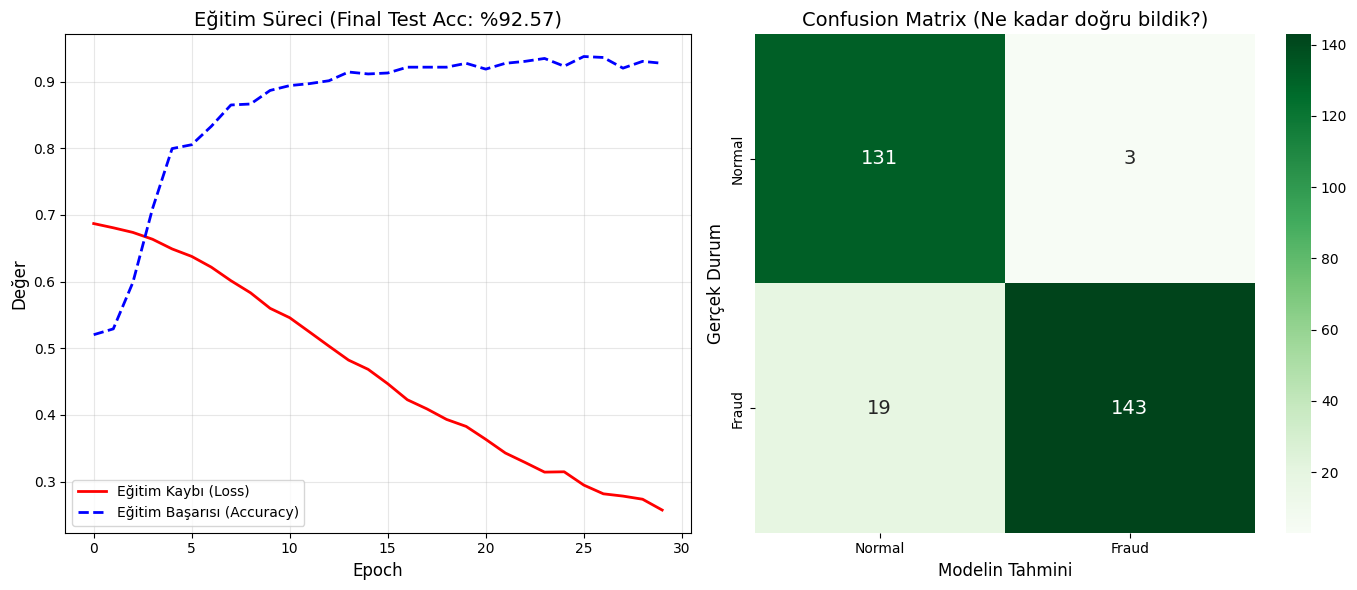


DETAYLI SINIFLANDIRMA RAPORU
              precision    recall  f1-score   support

      Normal       0.87      0.98      0.92       134
       Fraud       0.98      0.88      0.93       162

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pennylane as qml

# ==========================================
# 1. GÜÇLENDİRİLMİŞ AYARLAR
# ==========================================
n_qubits = 8
n_layers = 4
batch_size = 32
learning_rate = 0.001 # Hassas ayar için hızı biraz düşürdük

# ==========================================
# 2. VERİ HAZIRLIĞI
# ==========================================
print("Veri hazırlanıyor...")
df = pd.read_csv('creditcard.csv')

# Dengeleme (Hız için undersampling devam ediyor)
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, normal]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_balanced.drop(['Time', 'Class'], axis=1).values
y = df_balanced['Class'].values

# MinMaxScaler (-1, 1) PennyLane için en iyisi
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# ==========================================
# 3. PENNYLANE QNODE (8 QUBIT)
# ==========================================
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    # Veriyi 8 Qubit'e yayıyoruz
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
    # 2 Katmanlı dolaşıklık
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    # Tüm Qubitleri ölçüyoruz
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# ==========================================
# 4. GÜÇLENDİRİLMİŞ HİBRİT MODEL (ÖZEL MİMARİ)
# ==========================================
class StrongHybridModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Tam istediğin klasik katman yapısı:
        self.fc1 = nn.Linear(29, 16)
        self.fc2 = nn.Linear(16, n_qubits) # n_qubits = 8
        self.dropout = nn.Dropout(0.5)

        # Kuantum Katmanı (8 Qubit, 4 Katman)
        weight_shapes = {"weights": (n_layers, n_qubits, 3)}
        self.qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

        # Çıkış Katmanı
        self.fc_out = nn.Linear(n_qubits, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Klasik Akış: 29 -> 16
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)

        # Klasik Akış: 16 -> 2 (Kuantum öncesi son durak)
        x = torch.relu(self.fc2(x))

        # Kuantum Devresi Hazırlığı (Tanh * Pi)
        x = torch.tanh(x) * np.pi

        # Kuantum Katmanı İşlemesi
        x = self.qlayer(x)

        # Final Tahmini: 8 -> 1
        x = self.fc_out(x)
        return self.sigmoid(x)

# Modeli başlat
model = StrongHybridModel()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_func = nn.BCELoss()
# ==========================================
# 5. EĞİTİM
# ==========================================
print(f"Eğitim Başlıyor (Qubits: {n_qubits}, Layers: {n_layers})... 🚀")

epochs = 30 # Epoch sayısını artırdık
loss_list = []
acc_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        target = target.unsqueeze(1)
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        total_loss.append(loss.item())
        pred = (output > 0.5).float()
        correct += (pred == target).sum().item()
        total += target.size(0)

    avg_loss = sum(total_loss) / len(total_loss)
    avg_acc = 100 * correct / total
    loss_list.append(avg_loss)
    acc_list.append(avg_acc)

    if (epoch+1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs} \t Loss: {avg_loss:.4f} \t Train Acc: {avg_acc:.2f}%")

# ==========================================
# 6. TEST
# ==========================================
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        target = target.unsqueeze(1)
        output = model(data)
        pred = (output > 0.5).float()
        correct += (pred == target).sum().item()
        total += target.size(0)

final_acc = 100 * correct / total
print(f"\n🏆 GÜÇLENDİRİLMİŞ FİNAL TEST SONUCU: %{final_acc:.2f}")

# ==========================================
# SONUÇLARI GÖRSELLEŞTİRME MODÜLÜ
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Test Setini Tekrar Tarayıp Detaylı Veri Alalım
print("Grafikler için test verisi analiz ediliyor...")
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        # PennyLane için boyutu ayarla
        target = target.unsqueeze(1)
        output = model(data)

        # Tahminleri al (0.5 üstü 1, altı 0)
        predictions = (output > 0.5).float()

        # Listelere ekle
        y_true.extend(target.numpy().flatten())
        y_pred.extend(predictions.numpy().flatten())

# 2. Grafikleri Çiz
plt.figure(figsize=(14, 6))

# Grafik A: Eğitim Kaybı ve Başarısı
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Eğitim Kaybı (Loss)', color='red', linewidth=2)
plt.plot([acc/100 for acc in acc_list], label='Eğitim Başarısı (Accuracy)', color='blue', linestyle='--', linewidth=2)
plt.title(f'Eğitim Süreci (Final Test Acc: %{final_acc:.2f})', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Değer', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Grafik B: Confusion Matrix (Karmaşıklık Matrisi)
cm = confusion_matrix(y_true, y_pred)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'], annot_kws={"size": 14})
plt.title('Confusion Matrix (Ne kadar doğru bildik?)', fontsize=14)
plt.ylabel('Gerçek Durum', fontsize=12)
plt.xlabel('Modelin Tahmini', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Detaylı Raporu Yazdır (Precision, Recall, F1-Score)
print("\n" + "="*40)
print("DETAYLI SINIFLANDIRMA RAPORU")
print("="*40)
print(classification_report(y_true, y_pred, target_names=['Normal', 'Fraud']))

# 0 QUBİT

Klasik Sistem 2 (Kuantumsuz) Hazırlanıyor...
Klasik Sistem 2 Eğitimi Başlıyor... 💻
Epoch 5/30 	 Loss: 0.6783 	 Acc: %47.97
Epoch 10/30 	 Loss: 0.5697 	 Acc: %47.97
Epoch 15/30 	 Loss: 0.4480 	 Acc: %91.42
Epoch 20/30 	 Loss: 0.3902 	 Acc: %92.44
Epoch 25/30 	 Loss: 0.3623 	 Acc: %92.15
Epoch 30/30 	 Loss: 0.3338 	 Acc: %93.02

KLASİK SİSTEM 2 PERFORMANS ANALİZİ


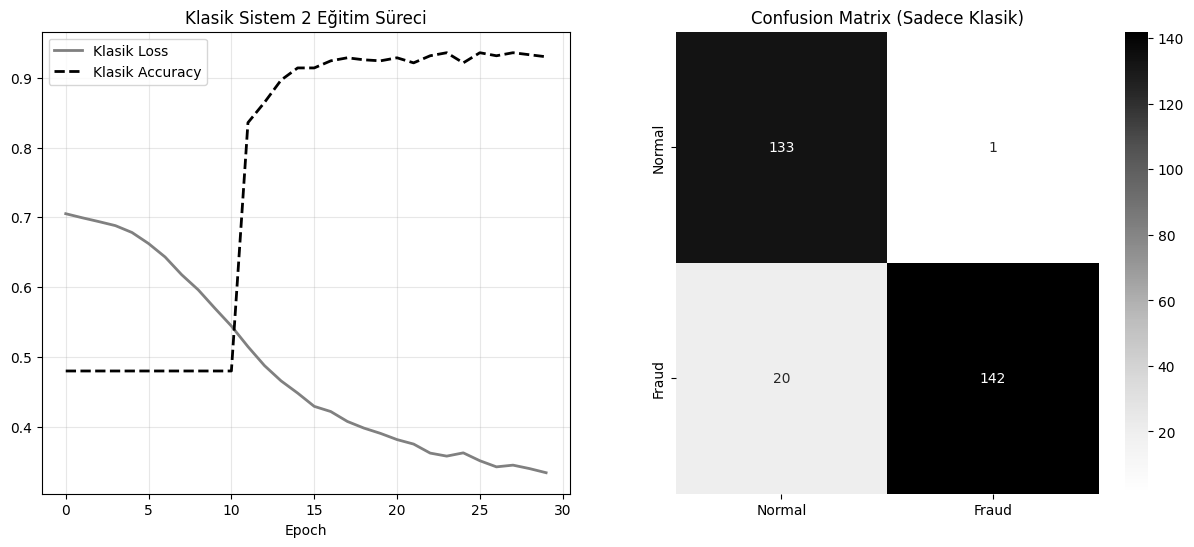


SINIFLANDIRMA RAPORU (KLASİK):
              precision    recall  f1-score   support

      Normal       0.87      0.99      0.93       134
       Fraud       0.99      0.88      0.93       162

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

# ==========================================
# 1. AYARLAR VE VERİ HAZIRLIĞI (Birebir Aynı)
# ==========================================
print("Klasik Sistem 2 (Kuantumsuz) Hazırlanıyor...")

# --- Ayarlar ---
n_features_bottleneck = 2  # Kuantumdaki 2 qubit yerine 2 nöron
batch_size = 32
learning_rate = 0.001

# --- Veri Yükleme ---
try:
    df = pd.read_csv('creditcard.csv')
except FileNotFoundError:
    print("Hata: creditcard.csv bulunamadı. Lütfen dosyanın dizinde olduğundan emin ol.")
    raise

# Dengeleme (System 2 ile aynı protokol)
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, normal]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_balanced.drop(['Time', 'Class'], axis=1).values
y = df_balanced['Class'].values

# Ölçeklendirme
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# ==========================================
# 2. SADECE KLASİK MODEL MİMARİSİ
# ==========================================
class PureClassicalSystem2(nn.Module):
    def __init__(self):
        super().__init__()
        # Katman 1: 29 -> 16
        self.fc1 = nn.Linear(29, 16)
        # Katman 2: 16 -> 2 (Kuantum girişindeki darboğazın aynısı)
        self.fc2 = nn.Linear(16, n_features_bottleneck)
        self.dropout = nn.Dropout(0.5)

        # KUANTUM KATMANI YERİNE GEÇEN KLASİK KATMAN
        # Hibrit modeldeki 2 qubitlik devrenin (2 giriş, 2 çıkış) klasik karşılığı
        self.classical_bridge = nn.Linear(n_features_bottleneck, n_features_bottleneck)

        # Çıkış: 2 -> 1
        self.fc3 = nn.Linear(n_features_bottleneck, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        # Fren Mekanizması (Kuantum modelindeki normalizasyonun aynısı)
        x = torch.tanh(x) * np.pi

        # Kuantum devresi yerine klasik doğrusal katman
        x = torch.relu(self.classical_bridge(x))

        x = self.fc3(x)
        return self.sigmoid(x)

# ==========================================
# 3. EĞİTİM
# ==========================================
model_c = PureClassicalSystem2()
optimizer = optim.Adam(model_c.parameters(), lr=learning_rate)
loss_func = nn.BCELoss()

print(f"Klasik Sistem 2 Eğitimi Başlıyor... 💻")

epochs = 30
loss_list_c = []
acc_list_c = []

for epoch in range(epochs):
    model_c.train()
    total_loss = 0
    correct = 0
    total = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        target = target.unsqueeze(1)
        output = model_c(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pred = (output > 0.5).float()
        correct += (pred == target).sum().item()
        total += target.size(0)

    avg_l = total_loss / len(train_loader)
    avg_a = 100 * correct / total
    loss_list_c.append(avg_l)
    acc_list_c.append(avg_a)

    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs} \t Loss: {avg_l:.4f} \t Acc: %{avg_a:.2f}")

# ==========================================
# 4. ANALİZ VE GÖRSELLEŞTİRME
# ==========================================
print("\n" + "="*50)
print("KLASİK SİSTEM 2 PERFORMANS ANALİZİ")
print("="*50)

model_c.eval()
y_true_c, y_pred_c = [], []
with torch.no_grad():
    for data, target in test_loader:
        output = model_c(data)
        pred = (output > 0.5).float()
        y_true_c.extend(target.numpy().flatten())
        y_pred_c.extend(pred.numpy().flatten())

# Grafik Çizimi
plt.figure(figsize=(15, 6))

# Öğrenme Eğrisi
plt.subplot(1, 2, 1)
plt.plot(loss_list_c, label='Klasik Loss', color='gray', linewidth=2)
plt.plot([a/100 for a in acc_list_c], label='Klasik Accuracy', color='black', linestyle='--', linewidth=2)
plt.title('Klasik Sistem 2 Eğitim Süreci')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

# Confusion Matrix
plt.subplot(1, 2, 2)
cm_c = confusion_matrix(y_true_c, y_pred_c)
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Greys', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix (Sadece Klasik)')
plt.show()

print("\nSINIFLANDIRMA RAPORU (KLASİK):")
print(classification_report(y_true_c, y_pred_c, target_names=['Normal', 'Fraud']))